#**Import the Libraries**

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#**Import the Dataset**

In [46]:
path = '/content/Data.csv'
df=pd.read_csv(path)
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


#**Selecting Independent and Dependent Values**

In [47]:
X = df.iloc[:, 0:3].values
y = df.iloc[:, -1].values

In [48]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [49]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

#**Manage Missing Data**
#**strategy='mean'**

In [50]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [51]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

#**Manage Missing Data**
#**strategy='median'**

In [52]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

#**Encoding Categorical Data**

Non Numeric to Numeric data

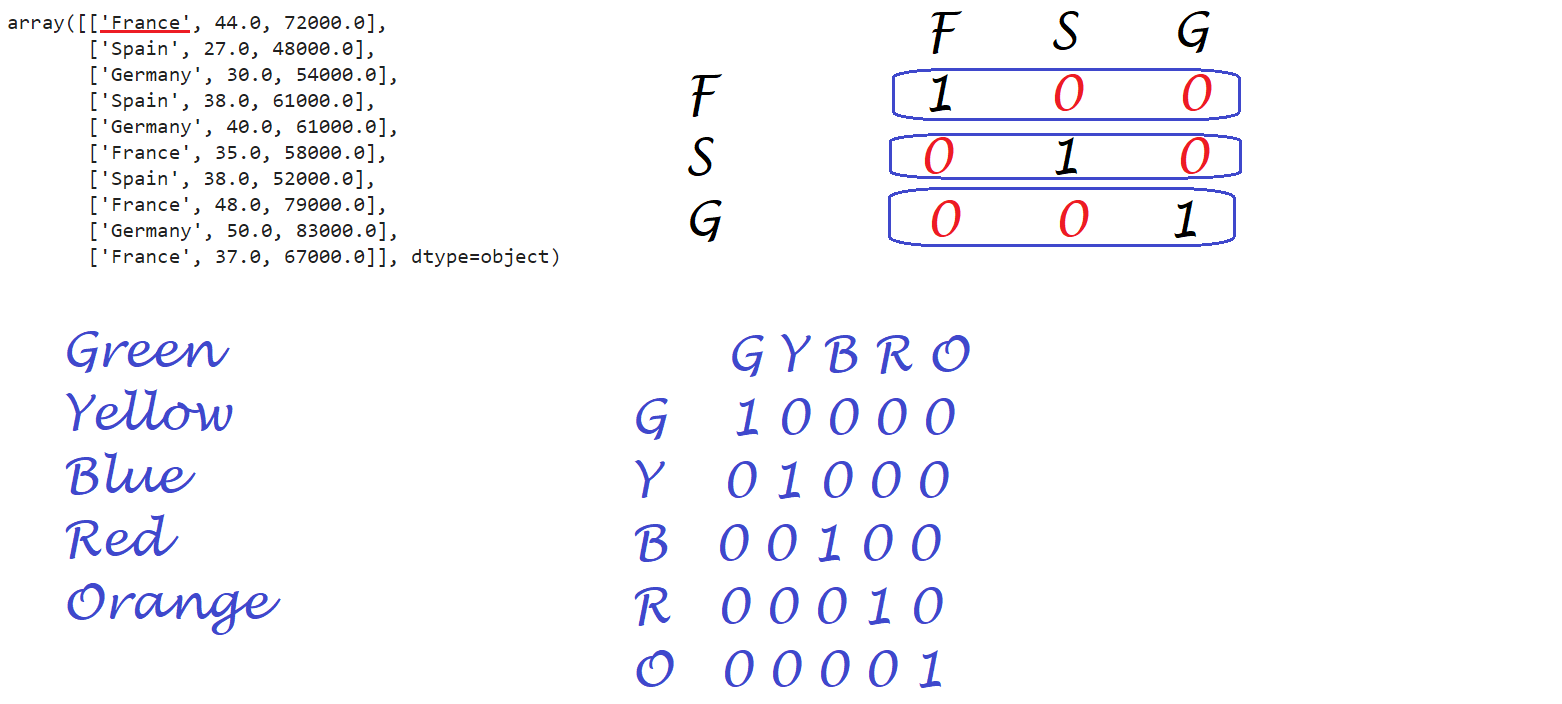

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [54]:
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

#**September 27, 2023**

#**Encoding the Dependent Variable**

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#**Splitting the dataset into the Training set and Test set**

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

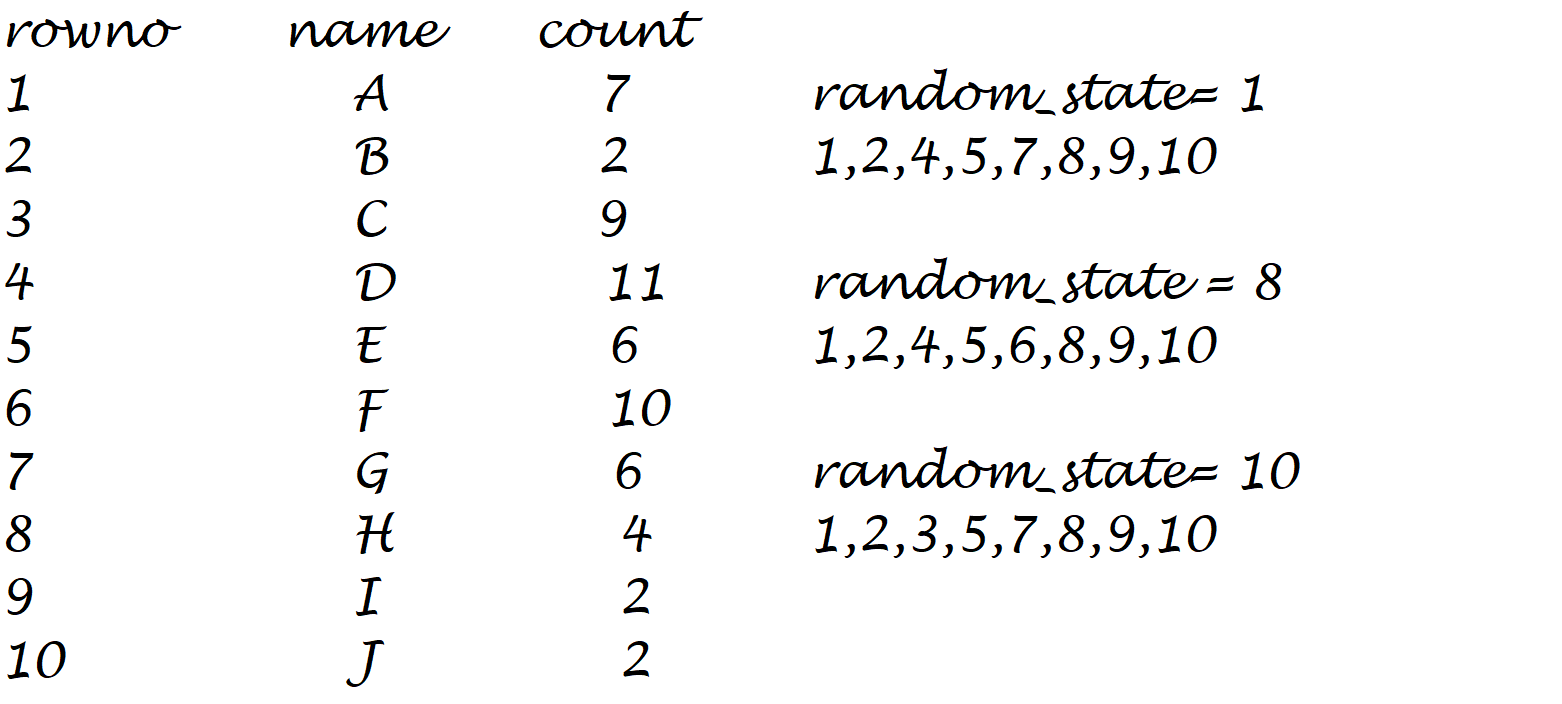

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
X_train, X_test, y_train, y_test

(array([[0.0, 1.0, 0.0, 40.0, 63777.77777777778],
        [1.0, 0.0, 0.0, 37.0, 67000.0],
        [0.0, 0.0, 1.0, 27.0, 48000.0],
        [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
        [1.0, 0.0, 0.0, 48.0, 79000.0],
        [0.0, 0.0, 1.0, 38.0, 61000.0],
        [1.0, 0.0, 0.0, 44.0, 72000.0],
        [1.0, 0.0, 0.0, 35.0, 58000.0]], dtype=object),
 array([[0.0, 1.0, 0.0, 30.0, 54000.0],
        [0.0, 1.0, 0.0, 50.0, 83000.0]], dtype=object),
 array([1, 1, 1, 0, 1, 0, 0, 1]),
 array([0, 0]))

#**Feature Selection**

In [59]:
## KG, Ltr, Watt, Pascal, Fer, Cel, $, Pound, Rupees, Gallon, Miles, KM, KB, Yard,

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [61]:
X_train

array([[0.0, 1.0, 0.0, 0.2630675731713538, 0.1238147854838185],
       [1.0, 0.0, 0.0, -0.25350147960148617, 0.4617563176278856],
       [0.0, 0.0, 1.0, -1.9753983221776195, -1.5309334063940294],
       [0.0, 0.0, 1.0, 0.05261351463427101, -1.1114197802841526],
       [1.0, 0.0, 0.0, 1.6405850472322605, 1.7202971959575162],
       [0.0, 0.0, 1.0, -0.08131179534387283, -0.16751412153692966],
       [1.0, 0.0, 0.0, 0.9518263102018072, 0.9861483502652316],
       [1.0, 0.0, 0.0, -0.5978808481167128, -0.48214934111933727]],
      dtype=object)

#**September 28, 2023**

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
df=pd.read_csv('Data.csv')
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [64]:
df['Purchased'] = df['Purchased'].replace('Yes', 'Y')
df['Purchased'] = df['Purchased'].replace('No', 'N')
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,N
1,Spain,27.0,48000.0,Y
2,Germany,30.0,54000.0,N
3,Spain,38.0,61000.0,N
4,Germany,40.0,NaN,Y
5,France,35.0,58000.0,Y
6,Spain,NaN,52000.0,N
7,France,48.0,79000.0,Y
8,Germany,50.0,83000.0,N
9,France,37.0,67000.0,Y


In [65]:
mean_salary=df['Salary'].mean().round(1)
mean_salary

63777.8

In [66]:
df['Salary'] = df['Salary'].fillna(mean_salary)
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,N
1,Spain,27.0,48000.0,Y
2,Germany,30.0,54000.0,N
3,Spain,38.0,61000.0,N
4,Germany,40.0,63777.8,Y
5,France,35.0,58000.0,Y
6,Spain,NaN,52000.0,N
7,France,48.0,79000.0,Y
8,Germany,50.0,83000.0,N
9,France,37.0,67000.0,Y


In [67]:
median_age =df['Age'].median()
median_age

38.0

In [68]:
df['Age'] = df['Age'].fillna(median_age)
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,N
1,Spain,27.0,48000.0,Y
2,Germany,30.0,54000.0,N
3,Spain,38.0,61000.0,N
4,Germany,40.0,63777.8,Y
5,France,35.0,58000.0,Y
6,Spain,38.0,52000.0,N
7,France,48.0,79000.0,Y
8,Germany,50.0,83000.0,N
9,France,37.0,67000.0,Y


In [69]:
df=pd.read_csv('Data.csv')
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [70]:
x = df.iloc[:, 0:3].values
y = df.iloc[:, -1].values

In [71]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [72]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

#Manage Missing Data#

In [73]:
from sklearn.impute import SimpleImputer

In [74]:
imputer_m = SimpleImputer(strategy = 'mean')
imputer_med = SimpleImputer(strategy = 'median')
imputer_mf = SimpleImputer(strategy = 'most_frequent')
imputer_cost = SimpleImputer(strategy = 'constant')

In [75]:
df['Salary'] = imputer_m.fit_transform(df[['Salary']]).round(0)
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,63778.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [76]:
df['Age']= imputer_med.fit_transform(df[['Age']])
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,63778.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,38.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [77]:
df['Age']= imputer_mf.fit_transform(df[['Age']])
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,63778.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,38.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [78]:
df['Age']= imputer_cost.fit_transform(df[['Age']])
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,63778.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,38.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [79]:
df=pd.read_csv('Data.csv')
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [80]:
x = df.iloc[:, 0:3].values
y = df.iloc[:, -1].values

In [81]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
# imputer.fit(x[:, 1:3])
# x[:, 1:3]=imputer.transform(x[:,1:3]).round(0)
x[:, 1:3]=imputer.fit_transform(x[:,1:3]).round(0)
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63778.0],
       ['France', 35.0, 58000.0],
       ['Spain', 39.0, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [82]:
df=pd.read_csv('Data.csv')
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [83]:
x = df.iloc[:, 0:3].values
y = df.iloc[:, -1].values

In [84]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')
# imputer.fit(x[:, 1:3])
x[:, 1:3]=imputer.fit_transform(x[:,1:3]).round(0)
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 61000.0],
       ['France', 35.0, 58000.0],
       ['Spain', 38.0, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

#Encoding Catagorical data#

In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0])], remainder='passthrough')

x = np.array(ct.fit_transform(x))
x

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 61000.0],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.0, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

#Encoding the Dependent Variable#

In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

#Splitting the dataset into the Training set and Test set#

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [88]:
x_train, x_test, y_train, y_test

(array([[0.0, 1.0, 0.0, 40.0, 61000.0],
        [1.0, 0.0, 0.0, 37.0, 67000.0],
        [0.0, 0.0, 1.0, 27.0, 48000.0],
        [0.0, 0.0, 1.0, 38.0, 52000.0],
        [1.0, 0.0, 0.0, 48.0, 79000.0],
        [0.0, 0.0, 1.0, 38.0, 61000.0],
        [1.0, 0.0, 0.0, 44.0, 72000.0],
        [1.0, 0.0, 0.0, 35.0, 58000.0]], dtype=object),
 array([[0.0, 1.0, 0.0, 30.0, 54000.0],
        [0.0, 1.0, 0.0, 50.0, 83000.0]], dtype=object),
 array([1, 1, 1, 0, 1, 0, 0, 1]),
 array([0, 0]))

#Feature Selection#

In [89]:
# different data units

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

x_train[:, 3:] = sc.fit_transform(x_train[:,3:])
x_test[:,3:] =sc.fit_transform(x_test[:,3:])
x_train, x_test

(array([[0.0, 1.0, 0.0, 0.27978023533368457, -0.13108062627326908],
        [1.0, 0.0, 0.0, -0.23673712220542542, 0.4981063798384225],
        [0.0, 0.0, 1.0, -1.958461647335792, -1.4943191395152675],
        [0.0, 0.0, 1.0, -0.06456466969238875, -1.0748611354408064],
        [1.0, 0.0, 0.0, 1.6571598554379778, 1.7564803920618055],
        [0.0, 0.0, 1.0, -0.06456466969238875, -0.13108062627326908],
        [1.0, 0.0, 0.0, 0.9684700453858313, 1.0224288849314989],
        [1.0, 0.0, 0.0, -0.5810820272314987, -0.4456741293291149]],
       dtype=object),
 array([[0.0, 1.0, 0.0, -1.0, -1.0],
        [0.0, 1.0, 0.0, 1.0, 1.0]], dtype=object))

In [94]:
df=pd.read_excel('/content/Data3.xlsx')
df

,Country,Age,Salary,Most_Freq,Constant,Purchased
0,France,44.0,72000.0,Pune,India,No
1,Spain,27.0,48000.0,Pune,India,Yes
2,Germany,30.0,54000.0,Mumbai,India,No
3,Spain,38.0,61000.0,Pune,India,No
4,Germany,40.0,NaN,Pune,India,Yes
5,France,35.0,58000.0,Nagpur,India,Yes
6,Spain,NaN,52000.0,Pune,India,No
7,France,48.0,79000.0,NaN,India,Yes
8,Germany,50.0,83000.0,Mumbai,India,No
9,France,37.0,67000.0,Pune,NaN,Yes


In [95]:
x = df.iloc[:, :5].values
x

array([['France', 44.0, 72000.0, 'Pune', 'India'],
       ['Spain', 27.0, 48000.0, 'Pune', 'India'],
       ['Germany', 30.0, 54000.0, 'Mumbai', 'India'],
       ['Spain', 38.0, 61000.0, 'Pune', 'India'],
       ['Germany', 40.0, nan, 'Pune', 'India'],
       ['France', 35.0, 58000.0, 'Nagpur', 'India'],
       ['Spain', nan, 52000.0, 'Pune', 'India'],
       ['France', 48.0, 79000.0, nan, 'India'],
       ['Germany', 50.0, 83000.0, 'Mumbai', 'India'],
       ['France', 37.0, 67000.0, 'Pune', nan]], dtype=object)

In [96]:
y = df.iloc[:, -1].values
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [97]:
from sklearn.impute import SimpleImputer
imputer_m = SimpleImputer(missing_values=np.nan, strategy= 'mean')
imputer_med = SimpleImputer(missing_values=np.nan, strategy= 'median')
imputer_mf = SimpleImputer(missing_values=np.nan, strategy= 'most_frequent')
imputer_cost = SimpleImputer(missing_values=np.nan, strategy= 'constant',fill_value= 'India')

In [98]:
x[:, 1:2] = imputer_med.fit_transform(x[:, 1:2])
x[:, 2:3] = imputer_m.fit_transform(x[:, 2:3]).round(0)
x[:, 3:4] = imputer_mf.fit_transform(x[:, 3:4])
x[:, 4:5] = imputer_cost.fit_transform(x[:, 4:5])
x

array([['France', 44.0, 72000.0, 'Pune', 'India'],
       ['Spain', 27.0, 48000.0, 'Pune', 'India'],
       ['Germany', 30.0, 54000.0, 'Mumbai', 'India'],
       ['Spain', 38.0, 61000.0, 'Pune', 'India'],
       ['Germany', 40.0, 63778.0, 'Pune', 'India'],
       ['France', 35.0, 58000.0, 'Nagpur', 'India'],
       ['Spain', 38.0, 52000.0, 'Pune', 'India'],
       ['France', 48.0, 79000.0, 'Pune', 'India'],
       ['Germany', 50.0, 83000.0, 'Mumbai', 'India'],
       ['France', 37.0, 67000.0, 'Pune', 'India']], dtype=object)

In [99]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct= ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0,3,4])], remainder='passthrough')
x= ct.fit_transform(x)
x

array([[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 40.0, 63778.0],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 38.0, 52000.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 37.0, 67000.0]], dtype=object)

In [100]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train, x_test, y_train, y_test

(array([[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 40.0, 63778.0],
        [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 37.0, 67000.0],
        [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 27.0, 48000.0],
        [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 38.0, 52000.0],
        [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 48.0, 79000.0],
        [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 38.0, 61000.0],
        [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 44.0, 72000.0],
        [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 35.0, 58000.0]], dtype=object),
 array([[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 30.0, 54000.0],
        [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 50.0, 83000.0]], dtype=object),
 array([1, 1, 1, 0, 1, 0, 0, 1]),
 array([0, 0]))

In [102]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train[:, 7:] = sc.fit_transform(x_train[:,7:])
x_test[:,7:] =sc.fit_transform(x_test[:,7:])
x_train, x_test

(array([[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.27978023533368457,
         0.12383513383528294],
        [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, -0.23673712220542542,
         0.461753237766921],
        [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, -1.958461647335792,
         -1.5309357674165436],
        [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, -0.06456466969238875,
         -1.1114222926410773],
        [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.6571598554379778,
         1.7202936620933198],
        [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, -0.06456466969238875,
         -0.16751697439627836],
        [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.9684700453858313,
         0.9861450812362538],
        [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, -0.5810820272314987,
         -0.48215208047787805]], dtype=object),
 array([[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, -1.0, -1.0],
        [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0]], dtype=object))